In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score
# all model use in machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
data=pd.read_excel("superstore.xlsx")
data

,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
882,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
883,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
884,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
885,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


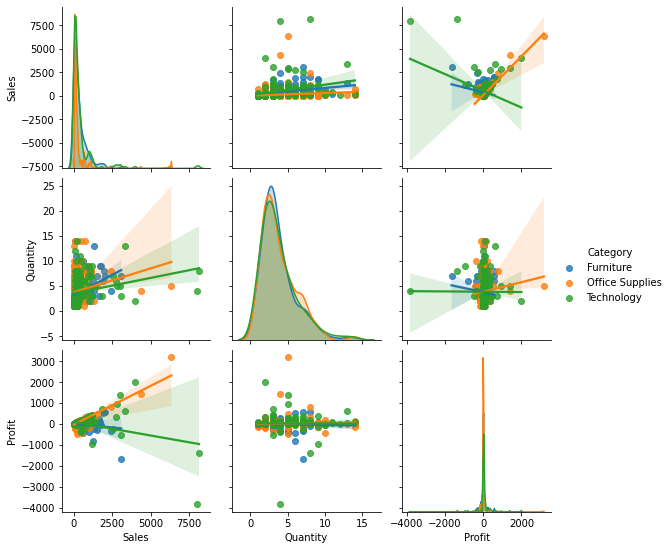

In [28]:
sns.pairplot(data,hue="Category",kind='reg',vars=["Sales", "Quantity","Profit"],height=2.5)
plt.show()

In [29]:
data.info()
print("\n")
print("Regions in table:",data["Region"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        887 non-null    object 
 1   Product ID    887 non-null    object 
 2   Category      887 non-null    object 
 3   Sub-Category  887 non-null    object 
 4   Product Name  887 non-null    object 
 5   Sales         887 non-null    float64
 6   Quantity      887 non-null    int64  
 7   Discount      887 non-null    float64
 8   Profit        887 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 62.5+ KB


Regions in table: ['South' 'West' 'Central' 'East']


In [6]:
#encoder object productId and Region
encoder=OrdinalEncoder()
region_encode=encoder.fit_transform(data[["Region"]])
category_encode=encoder.fit_transform(data[["Category"]])
sub_encode=encoder.fit_transform(data[["Sub-Category"]])
data[['Region']]=region_encode
data[['Category']]=category_encode
data[['Sub-Category']]=sub_encode
#--------use standard scaler to scale data------------
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
trans = trans.fit_transform(data[["Sales","Quantity","Discount","Profit","Region","Category","Sub-Category"]])
datas= pd.DataFrame(trans,columns=["Sales","Quantity","Discount","Profit","Region","Category","Sub-Category"])
scalery = StandardScaler().fit(data[["Profit"]].values) # scalery can untransform to normal values
#--------------------------------------------------

print("\n")
datas.describe()


,Sales,Quantity,Discount,Profit,Region,Category,Sub-Category
count,8.870000e+02,8.870000e+02,8.870000e+02,8.870000e+02,8.870000e+02,8.870000e+02,8.870000e+02
mean,2.403189e-17,-2.803720e-17,1.121488e-16,1.602126e-17,4.005314e-18,6.208237e-17,6.408503e-17
std,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00
min,-3.951845e-01,-1.216241e+00,-7.819319e-01,-1.654881e+01,-1.277891e+00,-1.551110e+00,-1.499983e+00
25%,-3.659294e-01,-7.889910e-01,-7.819319e-01,-7.138744e-02,-1.277891e+00,3.030905e-02,-9.132631e-01
50%,-3.020700e-01,-3.617413e-01,1.926674e-01,-4.068748e-02,-4.320034e-01,3.030905e-02,2.601764e-01
75%,-4.958317e-02,4.927581e-01,1.926674e-01,3.839247e-02,1.259771e+00,3.030905e-02,8.468961e-01
max,1.290199e+01,4.338005e+00,3.116465e+00,1.354968e+01,1.259771e+00,1.611728e+00,1.629189e+00


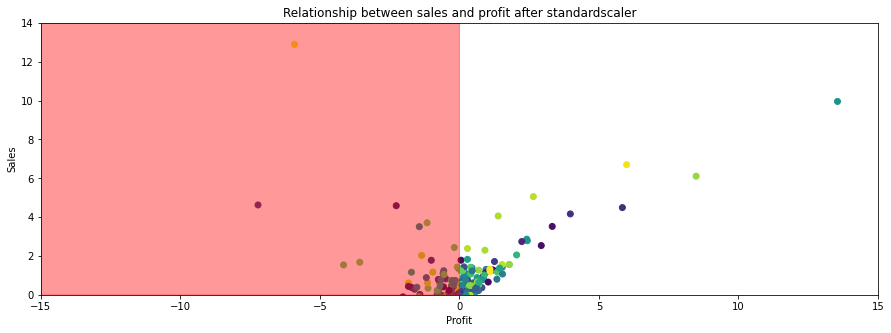

 Number of profit that less than 0:  591 
 Number of profit that big than 0:  296


In [7]:
#--------------------------------
array=datas.values
X = array[:,[0,1,2,4,5,6]]
y = array[:,3] #predict profit 

area=np.arange(-30,1,1)
y_area=np.arange(-1,30,1)
color=np.random.rand(len(y))
plt.figure(figsize=(15,5))
plt.title("Relationship between sales and profit after standardscaler")
plt.scatter(y,X[:,0],c=color)
plt.xlim(-15,15)
plt.ylim(0,14)
plt.xlabel("Profit")
plt.ylabel("Sales")

y_min_profit=y[y<0]
#plt.plot([0,0],[0,8500])# display with x is tip and y is total_bill
plt.fill_between(area,y_area,alpha=0.4,color="red") # Area that profit <0
plt.show()
print(" Number of profit that less than 0: ", len(y[y<0]), "\n", "Number of profit that big than 0: ",len(y[y>0]))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=2)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # tạo hàm đa thức để check accurancy 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
#----------------


def create_polynomial_regression_model(degree):
  #"Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree,include_bias=False) #,interaction_only=True
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
  return y_test_predict
    

y_test_predict=create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.13338146434384515
R2 score of training set is 0.9835898548751694


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.16306514241570924
R2 score of test set is 0.948940109174795


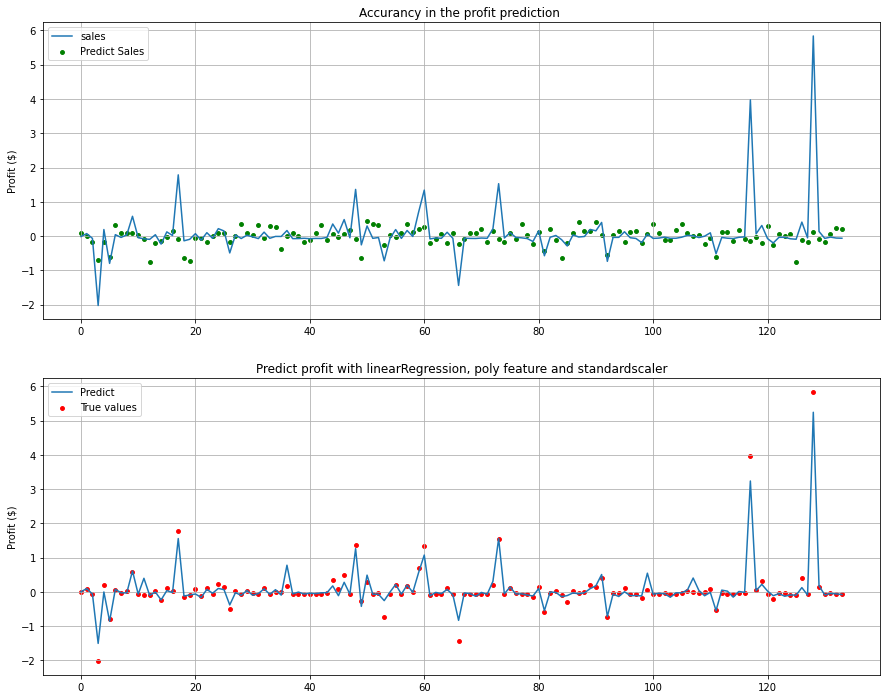

Accurancy with no poly feature: -0.6019904843831636 %
--------------------------------------
Mean Absolute Error: 0.3234085763755809
Mean Squared Error: 0.5239006773681737
Root Mean Squared Error: 0.7238098350866571


-----With linear and poly feature-----
Accurancy: 94.8940109174795 %
--------------------------------------
Mean Absolute Error: 0.0889069262155913
Mean Squared Error: 0.026590240671055535
Root Mean Squared Error: 0.16306514241570924


In [17]:


from sklearn import metrics

X_bar=np.arange(0,len(X_test),1)
# evaluate each model in turn
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
acc=r2_score(Y_test, y_pred) # test accurancy
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.scatter(X_bar,y_pred,color="green",marker="o",label="Predict Sales",s=15)
plt.plot(X_bar,Y_test,label="sales")
plt.title("Accurancy in the profit prediction ")
plt.legend(loc="best")
plt.ylabel("Profit ($)")
plt.grid(True)

plt.subplot(2,1,2)
plt.title("Predict profit with linearRegression, poly feature and standardscaler")
plt.ylabel("Profit ($)")
plt.scatter(X_bar,Y_test,color="red",label="True values",s=15)
plt.plot(X_bar,y_test_predict,label="Predict")
plt.legend(loc="best")

plt.grid(True)
plt.show()
print("Accurancy with no poly feature:", acc*100,"%")
print("--------------------------------------")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

print("\n")

print("-----With linear and poly feature-----")
print("Accurancy:", r2_score(Y_test, y_test_predict)*100,"%")
print("--------------------------------------")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_test_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))

In [19]:
#we can see that 94% will be good model to predict profit
df = pd.DataFrame({'Actual profit': scalery.inverse_transform(Y_test), 'Predicted by normal linear': scalery.inverse_transform(y_pred), 'Predict profit by linear and poly feature': scalery.inverse_transform(y_test_predict)})
df.head(15)

,Actual profit,Predicted by normal linear,Predict profit by linear and poly feature
0,15.5520,42.771599,19.650886
1,35.4150,21.407724,40.917490
2,2.6400,-18.509347,3.909870
3,-453.8490,-143.384184,-331.971251
4,62.9880,-25.158729,17.975547
5,-167.3184,-124.021800,-180.830929
6,28.1764,93.239838,36.197617
7,9.3312,39.414306,12.174027
8,26.6304,41.861930,11.421932
9,153.1152,37.684803,161.082542


In [20]:
#data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
# code above is used to change values basis.9y to new name 'Basic'


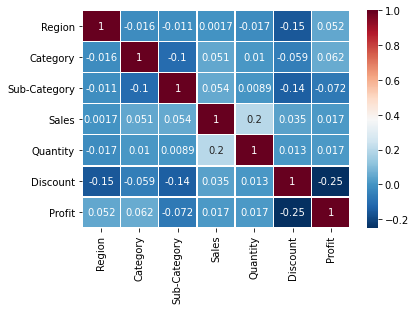

In [21]:
corr=data.corr()
corr["Profit"].sort_values(ascending=False)

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()
# it affects by all feature columns include region,category, sub-category, sales and discount--------------- 

In [22]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge
reg=LassoCV()
reg.fit(X_train,Y_train)
df["LassoCV"]=scalery.inverse_transform(reg.predict(X_test))
print("Score of LassoCV",reg.score(X_train,Y_train))
df.head(15)
# test all these models but it's too bad to use models such as RidgeCV,LassoCV,Ridge

Score of LassoCV 0.05749039413464008


,Actual profit,Predicted by normal linear,Predict profit by linear and poly feature,LassoCV
0,15.5520,42.771599,19.650886,45.171976
1,35.4150,21.407724,40.917490,8.084587
2,2.6400,-18.509347,3.909870,6.877579
3,-453.8490,-143.384184,-331.971251,-105.350194
4,62.9880,-25.158729,17.975547,6.636178
5,-167.3184,-124.021800,-180.830929,-41.956023
6,28.1764,93.239838,36.197617,47.827394
7,9.3312,39.414306,12.174027,45.171976
8,26.6304,41.861930,11.421932,45.171976
9,153.1152,37.684803,161.082542,9.050194
